### helper file to handle GNN model implementation in https://github.com/safe-graph/GNN-FakeNews


In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
from GNNFakeNews.utils.helpers import GNNModelTypeEnum
from torch_geometric.nn import GNNExplainer
from util import run_model, visualize_label_dist, visualize_edge_mask
import matplotlib.pyplot as plt
from GNNFakeNews.utils.helpers import GNNDatasetManager, HparamFactory
from GNNFakeNews.utils.enums import GNNDatasetTypeEnum

# 1.1. GCN GNN

In [2]:
gcn_model_politifact, dataset_manager_politifact = run_model(GNNModelTypeEnum.GCN_GNN, return_dataset_manager=True, local_load=True)

Loading data from directory: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/GNNFakeNews/data/local

************** epoch: 0 **************
loss_train: 0.9149, acc_train: 0.4194,
recall_train: 1.0000, auc_train: 0.5021,
loss_val: 10.9526, acc_val: 0.4194,
recall_val: 0.0000, auc_val: 0.3846
***************************************

************** epoch: 1 **************
loss_train: 6.4266, acc_train: 0.5806,
recall_train: 0.0000, auc_train: 0.4968,
loss_val: 2.3676, acc_val: 0.4194,
recall_val: 0.0000, auc_val: 0.3761
***************************************

************** epoch: 2 **************
loss_train: 1.4144, acc_train: 0.5806,
recall_train: 0.0000, auc_train: 0.5118,
loss_val: 0.9389, acc_val: 0.5806,
recall_val: 1.0000, auc_val: 0.6111
***************************************

************** epoch: 3 **************
loss_train: 1.2666, acc_train: 0.4194,
recall_train: 1.0000, auc_train: 0.4915,
loss_val: 0.6780, acc_val: 0.5806,
recall_val: 1.00

In [3]:
# pick the root node since it is the news itself, all leaf nodes are the users who shared this news
node_idx = 0
sample_data = dataset_manager_politifact.get_train_samples()[0].to(gcn_model_politifact.m_args.device)

x, edge_index, batch, num_graphs = sample_data.x, sample_data.edge_index, sample_data.batch, sample_data.num_graphs
gnn_explainer = GNNExplainer(gcn_model_politifact, epochs=200).to(gcn_model_politifact.m_args.device)
node_feat_mask, edge_mask = gnn_explainer.explain_graph(x=x, edge_index=edge_index)

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 302.17it/s]


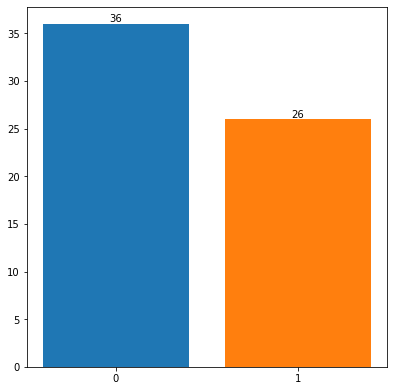

In [5]:
visualize_label_dist(sample_data.y)

### Visualize the edge mask to understand the distribution

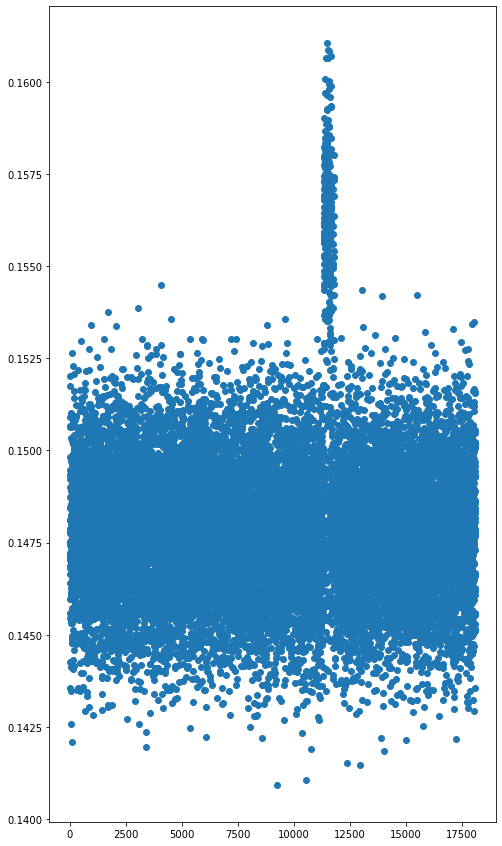

In [6]:
visualize_edge_mask(edge_mask)

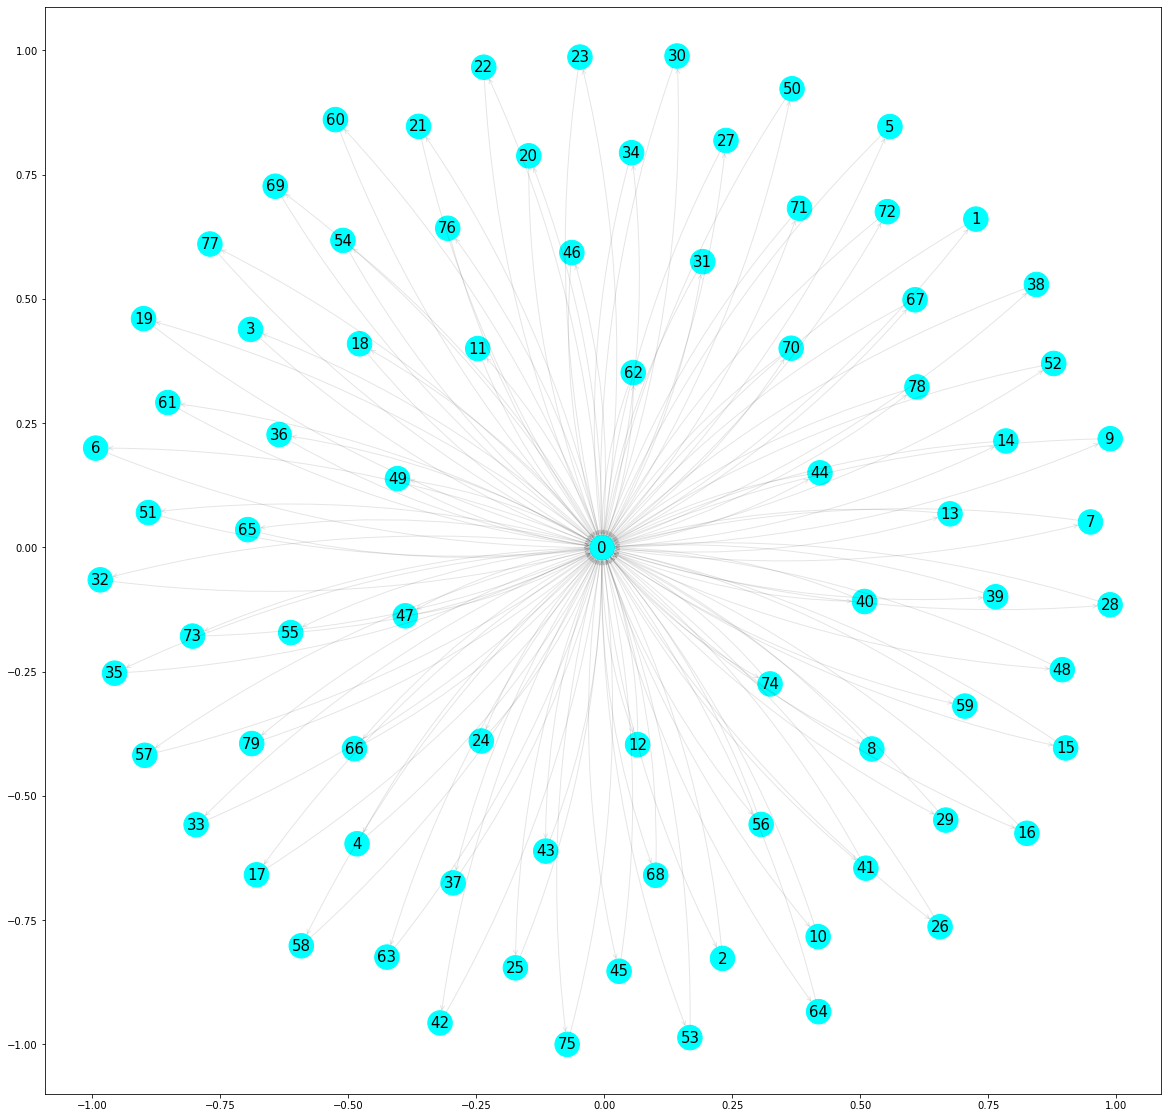

In [7]:
plt.figure(figsize=(20, 20))
ax, G = gnn_explainer.visualize_subgraph(node_idx=0,
                                         edge_index=edge_index.cpu(),
                                         edge_mask=edge_mask.cpu(),
                                         threshold=0.1550,
                                         #y=sample_data.y.cpu(),
                                         node_size=600, font_size=15)
plt.show()

In [8]:
gcn_model_gossipcop, dataset_manager_gossipcop = run_model(GNNModelTypeEnum.GCN_GNN, return_dataset_manager=True, local_load=True, hyperparams=HparamFactory(GNNModelTypeEnum.GCN_GNN)setattr('dataset', GNNDatasetTypeEnum.GOSSIPCOP))

Loading data from directory: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/GNNFakeNews/data/local

************** epoch: 0 **************
loss_train: 0.9149, acc_train: 0.4194,
recall_train: 1.0000, auc_train: 0.5021,
loss_val: 10.9526, acc_val: 0.4194,
recall_val: 0.0000, auc_val: 0.3846
***************************************

************** epoch: 1 **************
loss_train: 6.4266, acc_train: 0.5806,
recall_train: 0.0000, auc_train: 0.4968,
loss_val: 2.3676, acc_val: 0.4194,
recall_val: 0.0000, auc_val: 0.3761
***************************************

************** epoch: 2 **************
loss_train: 1.4144, acc_train: 0.5806,
recall_train: 0.0000, auc_train: 0.5118,
loss_val: 0.9389, acc_val: 0.5806,
recall_val: 1.0000, auc_val: 0.6111
***************************************

************** epoch: 3 **************
loss_train: 1.2666, acc_train: 0.4194,
recall_train: 1.0000, auc_train: 0.4915,
loss_val: 0.6780, acc_val: 0.5806,
recall_val: 1.00

In [16]:
node_feat_mask.shape

torch.Size([768])

# 1.2. GAT GNN

In [5]:
gat_model = run_model(GNNModelTypeEnum.GAT_GNN)

Loading data from directory: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/GNNFakeNews/data

************** epoch: 0 **************
loss_train: 0.6841, acc_train: 0.5806,
recall_train: 0.0000, auc_train: 0.3868,
loss_val: 0.6561, acc_val: 0.6452,
recall_val: 0.8889, auc_val: 0.8120
***************************************

************** epoch: 1 **************
loss_train: 0.6221, acc_train: 0.7581,
recall_train: 1.0000, auc_train: 0.9626,
loss_val: 3.6565, acc_val: 0.4194,
recall_val: 0.0000, auc_val: 0.7863
***************************************

************** epoch: 2 **************
loss_train: 2.5159, acc_train: 0.5806,
recall_train: 0.0000, auc_train: 0.9038,
loss_val: 0.8617, acc_val: 0.4194,
recall_val: 0.0000, auc_val: 0.7906
***************************************

************** epoch: 3 **************
loss_train: 0.6032, acc_train: 0.5806,
recall_train: 0.0000, auc_train: 0.9733,
loss_val: 0.6844, acc_val: 0.5806,
recall_val: 1.0000, auc

# 1.3. SAGE GNN

In [6]:
sage_model = run_model(GNNModelTypeEnum.SAGE_GNN)

Loading data from directory: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/GNNFakeNews/data

************** epoch: 0 **************
loss_train: 0.7126, acc_train: 0.4194,
recall_train: 1.0000, auc_train: 0.4049,
loss_val: 3.6238, acc_val: 0.4194,
recall_val: 0.0000, auc_val: 0.7179
***************************************

************** epoch: 1 **************
loss_train: 2.5610, acc_train: 0.5806,
recall_train: 0.0000, auc_train: 0.7842,
loss_val: 0.7341, acc_val: 0.4194,
recall_val: 0.0000, auc_val: 0.7863
***************************************

************** epoch: 2 **************
loss_train: 0.6378, acc_train: 0.5806,
recall_train: 0.0000, auc_train: 0.9530,
loss_val: 0.6852, acc_val: 0.5806,
recall_val: 1.0000, auc_val: 0.2692
***************************************

************** epoch: 3 **************
loss_train: 0.7469, acc_train: 0.4194,
recall_train: 1.0000, auc_train: 0.3333,
loss_val: 0.6868, acc_val: 0.6129,
recall_val: 0.9444, auc